In [2]:
%matplotlib inline
import numpy as np
from astropy.io import fits as pf
import matplotlib
from matplotlib import pyplot as plt
import scipy.interpolate as sciinterp
import scipy.constants
import scipy.signal

In [3]:
def openFile(filename):
    
    """Given the filename of a fits file extracts the data.
       Works on both flux and wavlength solution files."""
    
    file = pf.open(filename)
    
    return file[0].data

In [4]:
def sciinterpolate(new_bins, old_bins, old_flux, method = "linear"):
    
    if len(new_bins) > len(old_bins):
        new_bins = new_bins[0:-2]
    interpfunc = sciinterp.interp1d(old_bins, old_flux, kind = method, bounds_error=False)
    new_flux = interpfunc(new_bins)
    
    return new_flux[0:-2]

In [5]:
def deltalambda(wavelengths, velocity):

    """Create new wavlength bins constant in deltalambda/lambda."""
    
    c = scipy.constants.c
    new_wavelengths = np.array([])
    new_wavelengths = np.append(new_wavelengths, wavelengths[0])
    for i in range(len(wavelengths) - 1):
        y1 = wavelengths[i]
        delta = velocity*y1/c
        y2 = y1 + delta
        new_wavelengths = np.append(new_wavelengths, y2)
        y1 = y2
        
    return new_wavelengths

In [47]:
lamp = openFile("rbel.139.fits")
wavelength = openFile("apf_wave_mod.fits")
flux1 = openFile("rarp.210.fits")

In [7]:
mask = np.ones(len(lamp))
mask

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

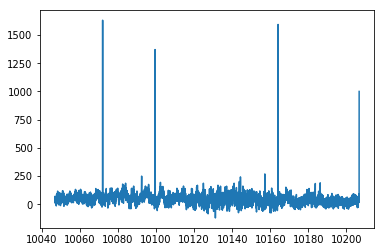

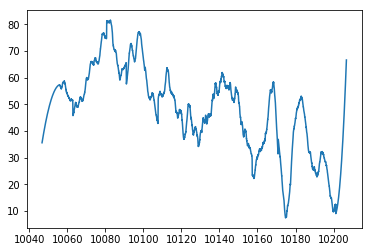

In [8]:
len(lamp)
i = 78
plt.plot(wavelength[i], lamp[i])
plt.show()
plt.plot(wavelength[i], scipy.signal.savgol_filter(lamp[i], 431, 2))

In [9]:
mask[i] = 0

In [10]:
unusable = 79 - np.count_nonzero(mask)
percent_unuse = 100*unusable/len(lamp)
percent_unuse

1.2658227848101267

In [11]:
lamp24 = lamp[24]
flux24 = flux1[24]
wavelength24 = wavelength[24]
lamp25 = lamp[25]
flux25 = flux1[25]
wavelength25 = wavelength[25]
lamp26 = lamp[26]
flux26 = flux1[26]
wavelength26 = wavelength[26]

In [12]:
smoothlamp1 = scipy.signal.savgol_filter(lamp24, 431, 2)
smoothlamp2 = scipy.signal.savgol_filter(lamp25, 431, 2)
smoothlamp3 = scipy.signal.savgol_filter(lamp26, 431, 2)

In [42]:
lamp2SG = scipy.signal.savgol_filter(lamp25, 431, 2)
lamp2Med = scipy.signal.medfilt(lamp25, 431)

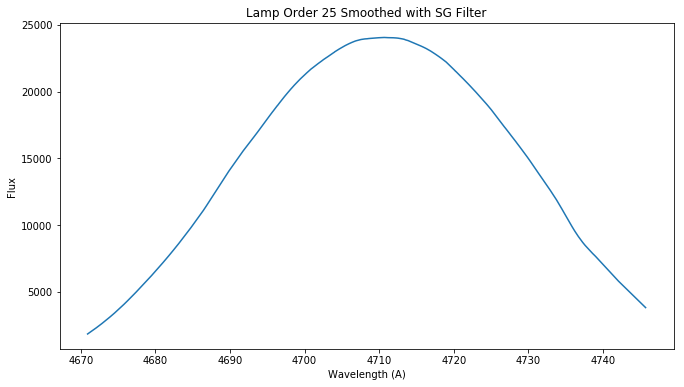

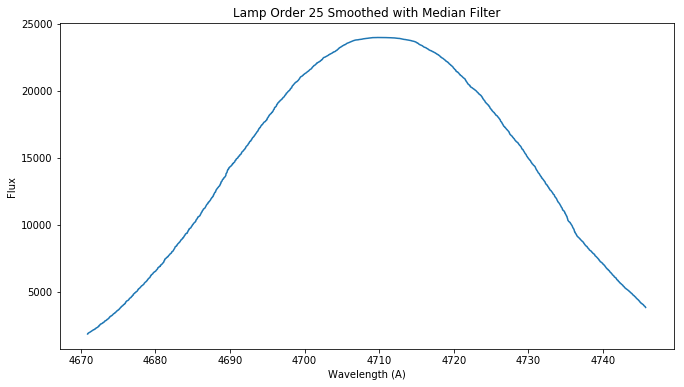

In [45]:
fig, ax = plt.subplots(1, 1, figsize = (11, 6))
ax.plot(wavelength[25][0:-2], lamp2SG[0:-2])
ax.title.set_text("Lamp Order 25 Smoothed with SG Filter")
ax.set_ylabel("Flux")
ax.set_xlabel("Wavelength (A)")
plt.show()
fig, ax = plt.subplots(1, 1, figsize = (11, 6))
ax.plot(wavelength[25][0:-2], lamp2Med[0:-2])
ax.title.set_text("Lamp Order 25 Smoothed with Median Filter")
ax.set_ylabel("Flux")
ax.set_xlabel("Wavelength (A)")
plt.show()

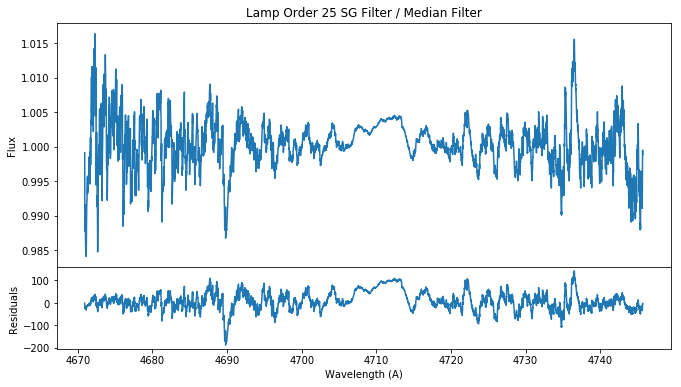

In [44]:
fig, axs = plt.subplots(2, 1, sharex=True, gridspec_kw = {'height_ratios':[3, 1]}, figsize = (11, 6))
fig.subplots_adjust(hspace=0)
ax1 = axs[0]
ax1.plot(wavelength[25][0:-2], (lamp2SG/lamp2Med)[0:-2])
ax1.title.set_text("Lamp Order 25 SG Filter / Median Filter")
ax1.set_ylabel("Flux")
ax2 = axs[1]
ax2.plot(wavelength[25][0:-2], (lamp2SG - lamp2Med)[0:-2])
ax2.set_ylabel("Residuals")
plt.xlabel("Wavelength (A)")
plt.show()

In [83]:
a = np.polyfit(wavelength[25][0:-2], (lamp2SG/lamp2Med)[0:-2], 1)
slope = a[0]
slope

-1.7857873372269669e-05

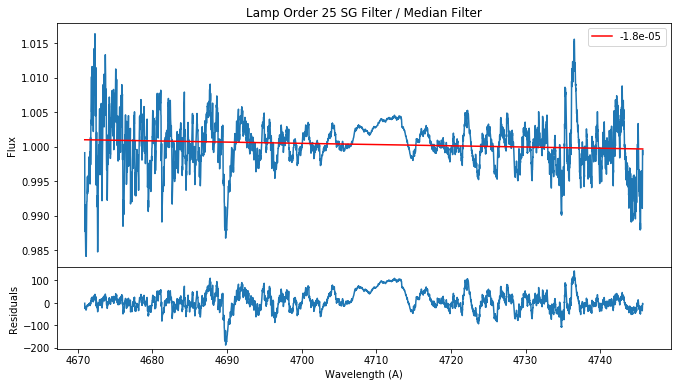

In [92]:
fig, axs = plt.subplots(2, 1, sharex=True, gridspec_kw = {'height_ratios':[3, 1]}, figsize = (11, 6))
fig.subplots_adjust(hspace=0)
ax1 = axs[0]
ax1.plot(wavelength[25][0:-2], (lamp2SG/lamp2Med)[0:-2])
ax1.plot(wavelength[25][0:-2], slope*wavelength[25][0:-2] + a[1], 'r', label = np.round(slope, 6))
ax1.legend()
ax1.title.set_text("Lamp Order 25 SG Filter / Median Filter")
ax1.set_ylabel("Flux")
ax2 = axs[1]
ax2.plot(wavelength[25][0:-2], (lamp2SG - lamp2Med)[0:-2])
ax2.set_ylabel("Residuals")
plt.xlabel("Wavelength (A)")
plt.show()

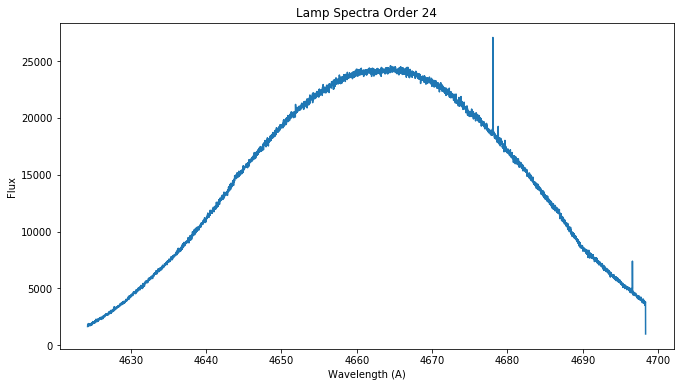

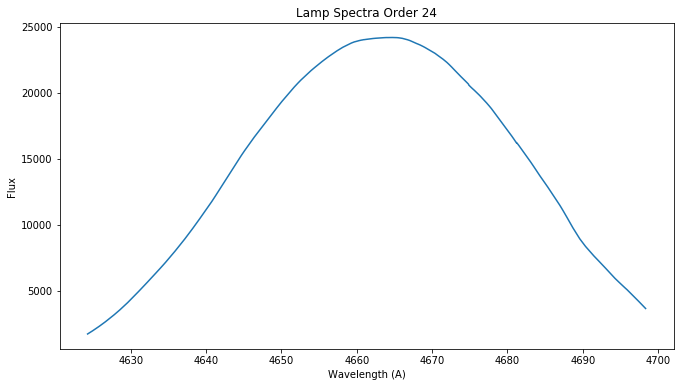

In [13]:
fig, ax = plt.subplots(1, 1, figsize = (11, 6))
ax.plot(wavelength24, lamp24)
ax.title.set_text("Lamp Spectra Order 24")
ax.set_ylabel("Flux")
ax.set_xlabel("Wavelength (A)")
plt.show()
fig, ax = plt.subplots(1, 1, figsize = (11, 6))
ax.plot(wavelength24, smoothlamp1)
ax.title.set_text("Lamp Spectra Order 24")
ax.set_ylabel("Flux")
ax.set_xlabel("Wavelength (A)")
plt.show()

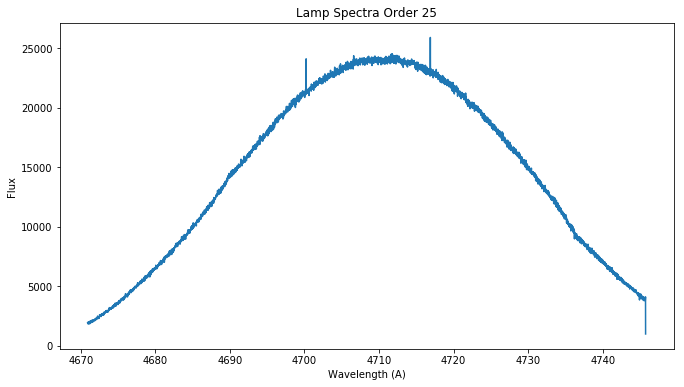

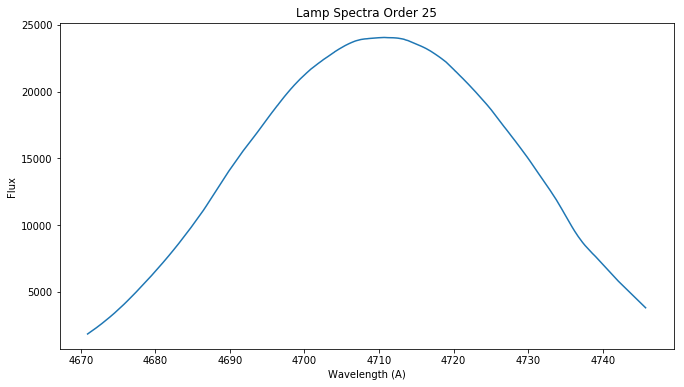

In [14]:
fig, ax = plt.subplots(1, 1, figsize = (11, 6))
ax.plot(wavelength25, lamp25)
ax.title.set_text("Lamp Spectra Order 25")
ax.set_ylabel("Flux")
ax.set_xlabel("Wavelength (A)")
plt.show()
fig, ax = plt.subplots(1, 1, figsize = (11, 6))
ax.plot(wavelength25, smoothlamp2)
ax.title.set_text("Lamp Spectra Order 25")
ax.set_ylabel("Flux")
ax.set_xlabel("Wavelength (A)")
plt.show()

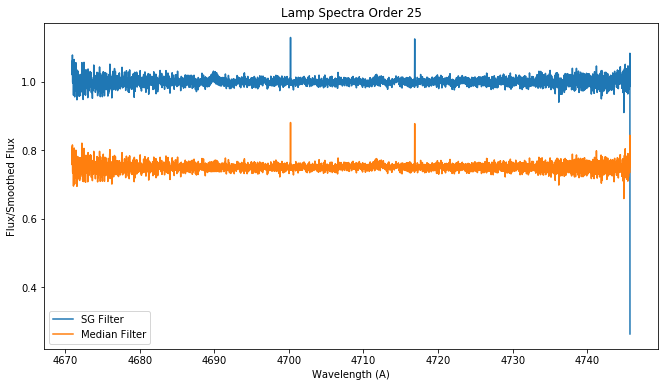

In [128]:
fig, ax = plt.subplots(1, 1, figsize = (11, 6))
ax.plot(wavelength25, lamp25/smoothlamp2, label = 'SG Filter')
ax.plot(wavelength25, (lamp25/lamp2Med) - 0.25, label = 'Median Filter')
ax.legend(loc = 'best')
ax.title.set_text("Lamp Spectra Order 25")
ax.set_ylabel("Flux/Smoothed Flux")
ax.set_xlabel("Wavelength (A)")
plt.show()

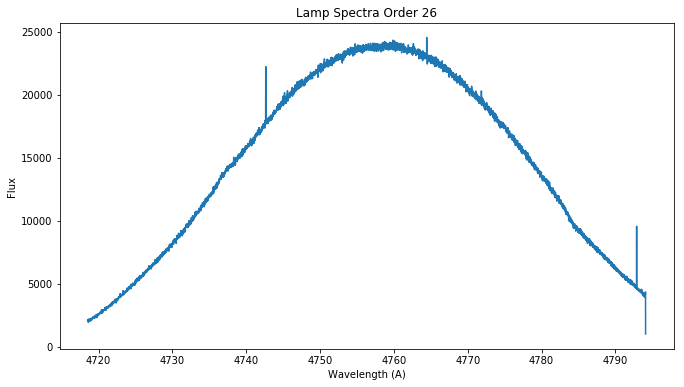

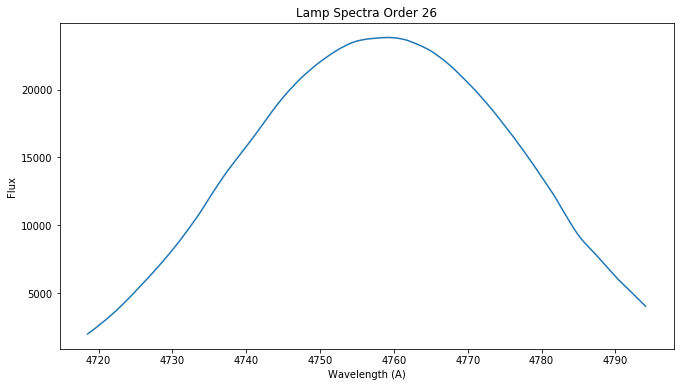

In [16]:
fig, ax = plt.subplots(1, 1, figsize = (11, 6))
ax.plot(wavelength26, lamp26)
ax.title.set_text("Lamp Spectra Order 26")
ax.set_ylabel("Flux")
ax.set_xlabel("Wavelength (A)")
plt.show()
fig, ax = plt.subplots(1, 1, figsize = (11, 6))
ax.plot(wavelength26, smoothlamp3)
ax.title.set_text("Lamp Spectra Order 26")
ax.set_ylabel("Flux")
ax.set_xlabel("Wavelength (A)")
plt.show()

In [17]:
deltalambda1 = deltalambda(wavelength24, 1300)
deltalambda2 = deltalambda(wavelength25, 1300)
deltalambda3 = deltalambda(wavelength26, 1300)

In [93]:
newlamp1 = sciinterpolate(deltalambda1, wavelength24, smoothlamp1, method = 'cubic')
newflux1 = sciinterpolate(deltalambda1, wavelength24, flux24, method = 'cubic')
newlamp2 = sciinterpolate(deltalambda2, wavelength25, smoothlamp2, method = 'cubic')
newlamp2Med = sciinterpolate(deltalambda2, wavelength25, lamp2Med, method = 'cubic')
newflux2 = sciinterpolate(deltalambda2, wavelength25, flux25, method = 'cubic')
newlamp3 = sciinterpolate(deltalambda3, wavelength26, smoothlamp3, method = 'cubic')
newflux3 = sciinterpolate(deltalambda3, wavelength26, flux26, method = 'cubic')

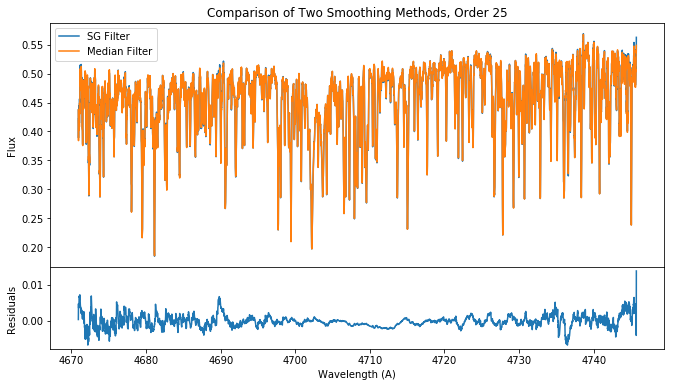

In [99]:
fig, axs = plt.subplots(2, 1, sharex=True, gridspec_kw = {'height_ratios':[3, 1]}, figsize = (11, 6))
fig.subplots_adjust(hspace=0)
ax1 = axs[0]
ax1.plot(deltalambda2[0:-2], newflux2/newlamp2, label = "SG Filter")
ax1.plot(deltalambda2[0:-2], newflux2/newlamp2Med, label = "Median Filter")    
ax1.title.set_text("Comparison of Two Smoothing Methods, Order 25")
ax1.set_ylabel("Flux")
ax1.legend()
ax2 = axs[1]
ax2.plot(deltalambda2[0:-2], newflux2/newlamp2 - newflux2/newlamp2Med)
ax2.set_ylabel("Residuals")
plt.xlabel("Wavelength (A)")
plt.show()

In [106]:
a = np.polyfit(deltalambda2[0:-2], newflux2/newlamp2, 1)
slope = a[0]
print(slope)
b = np.polyfit(deltalambda2[0:-2], newflux2/newlamp2Med, 1)
slope2 = b[0]
print(slope2)
print(slope2 - slope)

0.000678189067538
0.000669501937888
-8.68712964956e-06


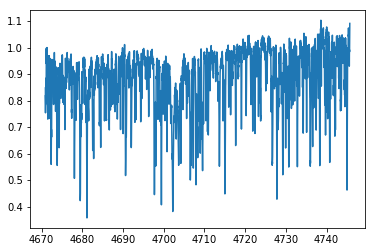

In [118]:
percentilenorm = np.percentile(newflux2/newlamp2, 90)
plt.plot(deltalambda2[0:-2], newflux2/newlamp2/percentilenorm)

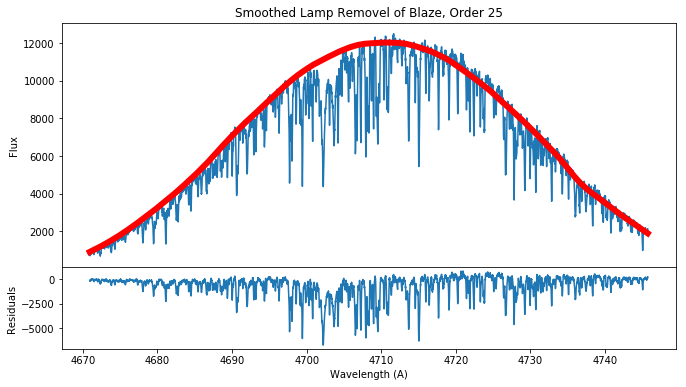

In [20]:
fig, axs = plt.subplots(2, 1, sharex=True, gridspec_kw = {'height_ratios':[3, 1]}, figsize = (11, 6))
fig.subplots_adjust(hspace=0)
ax1 = axs[0]
ax1.plot(deltalambda2[0:-2], newflux2)
ax1.plot(deltalambda2[0:-2], newlamp2/2, "r", linewidth = 6)    
ax1.title.set_text("Smoothed Lamp Removel of Blaze, Order 25")
ax1.set_ylabel("Flux")
ax2 = axs[1]
ax2.plot(deltalambda2[0:-2], newflux2 - newlamp2/2)
ax2.set_ylabel("Residuals")
plt.xlabel("Wavelength (A)")
plt.show()

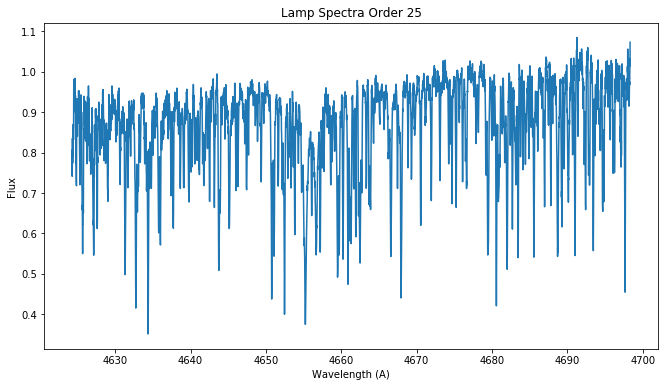

In [119]:
fig, ax = plt.subplots(1, 1, figsize = (11, 6))
ax.plot(deltalambda1[0:-2], newflux2/newlamp2/np.percentile(newflux2/newlamp2, 95))
ax.title.set_text("Lamp Spectra Order 25")
ax.set_ylabel("Flux")
ax.set_xlabel("Wavelength (A)")
plt.show()

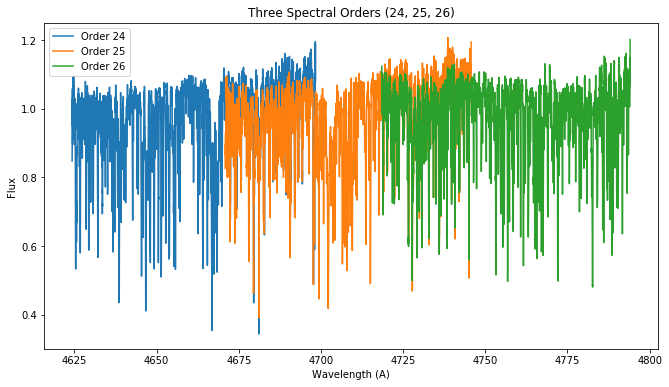

In [22]:
fig, ax = plt.subplots(1, 1, figsize = (11, 6))
ax.plot(deltalambda1[0:-2], (1/np.median(newflux1/newlamp1)*newflux1/newlamp1), label = "Order 24")
ax.plot(deltalambda2[0:-2], (1/np.median(newflux2/newlamp2)*newflux2/newlamp2), label = "Order 25")
ax.plot(deltalambda3[0:-2], (1/np.median(newflux3/newlamp3)*newflux3/newlamp3), label = "Order 26")
ax.title.set_text("Three Spectral Orders (24, 25, 26)")
ax.set_ylabel("Flux")
ax.set_xlabel("Wavelength (A)")
ax.legend()
plt.show()

In [25]:
len(newflux1)

4606

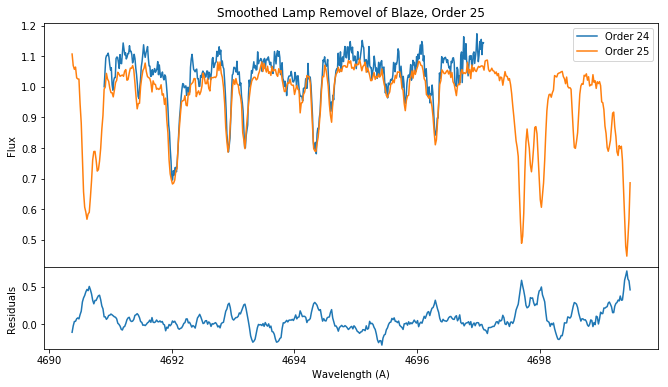

In [122]:
fig, axs = plt.subplots(2, 1, sharex=True, gridspec_kw = {'height_ratios':[3, 1]}, figsize = (11, 6))
fig.subplots_adjust(hspace=0)
ax1 = axs[0]
ax1.plot(deltalambda1[4000:4500], (1/np.median(newflux1/newlamp1)*newflux1/newlamp1)[4000:4500], label = "Order 24")
ax1.plot(deltalambda2[1000:1500], (1/np.median(newflux2/newlamp2)*newflux2/newlamp2)[1000:1500], label = "Order 25")   
ax1.title.set_text("Smoothed Lamp Removel of Blaze, Order 25")
ax1.set_ylabel("Flux")
ax1.legend()
ax2 = axs[1]
ax2.plot(deltalambda2[1000:1500], (1/np.median(newflux1/newlamp1)*newflux1/newlamp1)[4000:4500] - (1/np.median(newflux2/newlamp2)*newflux2/newlamp2)[1000:1500])
ax2.set_ylabel("Residuals")
plt.xlabel("Wavelength (A)")
plt.show()

In [75]:
d1 = deltalambda1[4000:4500]
d1[-1] - d1[0]

6.1886090116286141

In [123]:
#in the same number of pixels order 25 covers a larger wavelength
d2 = deltalambda2[1000:1500]
d2[-1] - d2[0]

9.1050934452950969

## B Star

In [48]:
bstar = openFile("rbha.187.fits")
bstar25 = bstar[25]
#deltalambda2

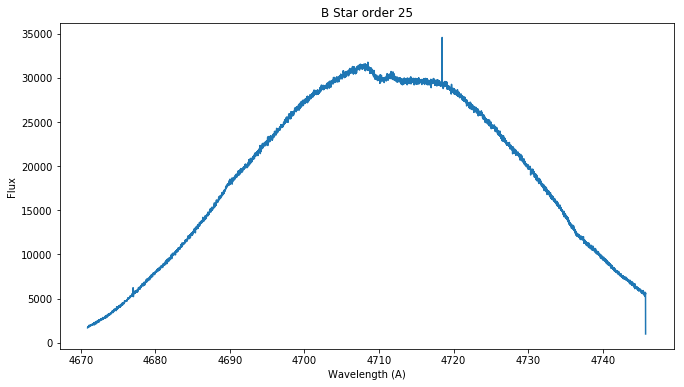

In [54]:
fig, ax = plt.subplots(1, 1, figsize = (11, 6))
ax.plot(wavelength25, bstar25)
ax.title.set_text("B Star order 25")
ax.set_ylabel("Flux")
ax.set_xlabel("Wavelength (A)")
plt.show()

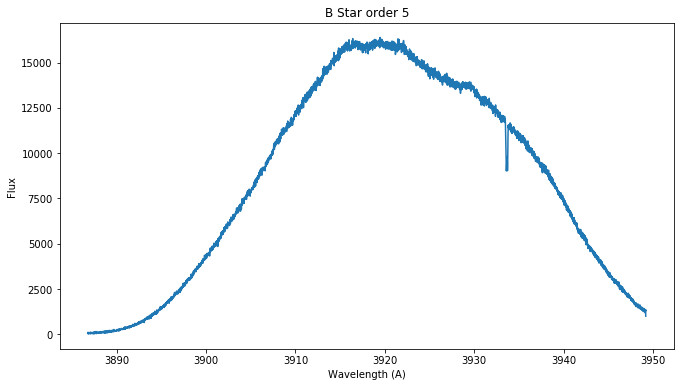

In [57]:
fig, ax = plt.subplots(1, 1, figsize = (11, 6))
ax.plot(wavelength[5], bstar[5])
ax.title.set_text("B Star order 5")
ax.set_ylabel("Flux")
ax.set_xlabel("Wavelength (A)")
plt.show()

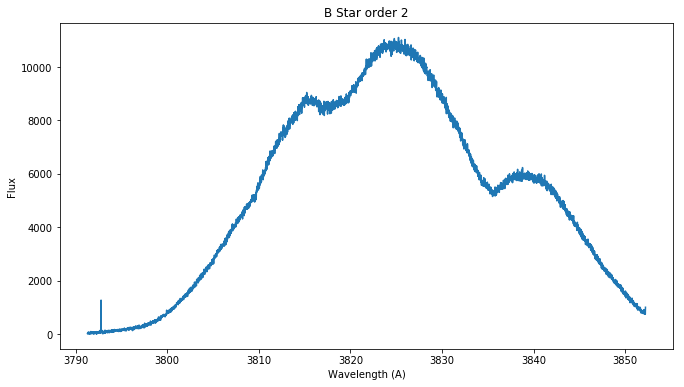

In [70]:
fig, ax = plt.subplots(1, 1, figsize = (11, 6))
ax.plot(wavelength[2], bstar[2])
ax.title.set_text("B Star order 2")
ax.set_ylabel("Flux")
ax.set_xlabel("Wavelength (A)")
plt.show()